# PRJDB19812 Honda et al.

Article link: [Honda](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0317076).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJDB19812"
lineages_in_paper <- c(
    "XBT", "XBB.1.9.1", "BA.2.75", "XBB.1.16", "EG.5", "BA.5"
)


In [6]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


In [3]:
barcodes <- provoc::usher_barcodes()
print("Lineages not in barcodes:")
print(setdiff(lineages_in_paper, rownames(barcodes)))
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


usher_barcodes.csv not found. Downloading from.https://raw.githubusercontent.com/andersen-lab/Freyja/main/freyja/data/usher_barcodes.csv
Writing to ./usher_barcodes.csv 
[1] "Lineages not in barcodes:"
character(0)


In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


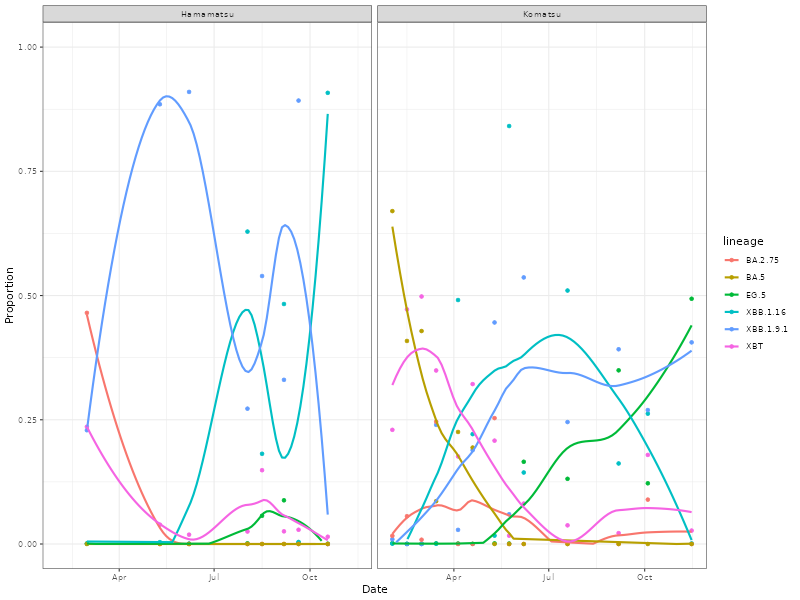

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
